In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
titanic=pd.read_csv("E:/BaiduNetdiskDownload/titanic/train.csv")

In [3]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# Detect and Remove Outliers

**Use IQR to detect outliers**

In [4]:
col=["Age","SibSp","Parch","Fare"]
q1=titanic[col].quantile(0.25)
q3=titanic[col].quantile(0.75)
iqr=q3-q1

In [5]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
outliers=titanic[col][(titanic[col]<q1-1.5*iqr)|(titanic[col]>q3+1.5*iqr)].dropna(axis=0,how='all',thresh=3)
outliers.index

Int64Index([27, 88, 159, 180, 201, 324, 341, 745, 792, 846, 863], dtype='int64')

In [7]:
titanic=titanic.drop(outliers.index,axis=0)

In [8]:
print(titanic.shape[0])

880


# Plot the distribution of each variables

[Text(0, 0, 'Not Survived'), Text(0, 0, 'Survived')]

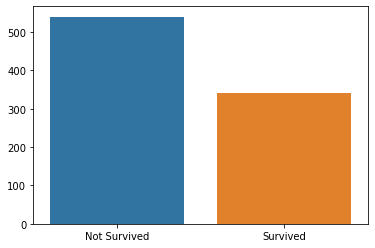

In [9]:
import seaborn as sns
survived_count=titanic["Survived"].value_counts()
ax1=sns.barplot(x=survived_count.index,y=survived_count.values)
#plt.xticks([0,1],["Not Survived","Survived"],rotation=0)
ax1.set_xticklabels(["Not Survived","Survived"],rotation=0)

[Text(0, 0, 'Lower'), Text(0, 0, 'Middle'), Text(0, 0, 'Upper')]

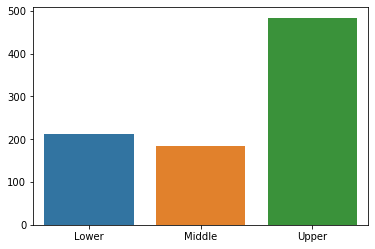

In [10]:
pclass_count=titanic["Pclass"].value_counts()
ax2=sns.barplot(x=pclass_count.index,y=pclass_count.values)
ax2.set_xticklabels(["Lower","Middle","Upper"],rotation=0)

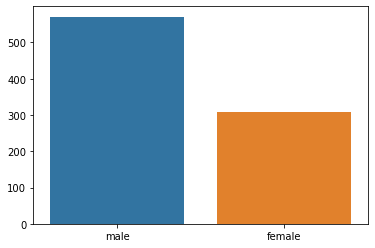

In [11]:
sex_count=titanic["Sex"].value_counts()
ax=sns.barplot(x=sex_count.index,y=sex_count.values)

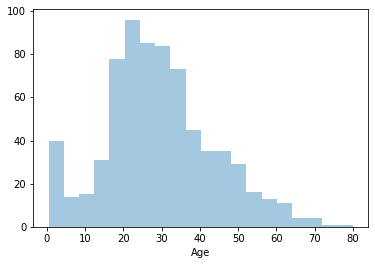

In [12]:
sns.distplot(titanic["Age"],kde=False)

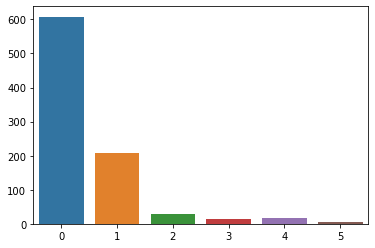

In [13]:
sib_count=titanic["SibSp"].value_counts()
ax=sns.barplot(x=sib_count.index,y=sib_count.values)

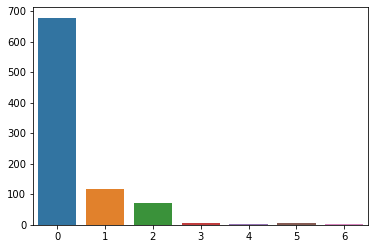

In [14]:
parch_count=titanic["Parch"].value_counts()
ax=sns.barplot(x=parch_count.index,y=parch_count.values)

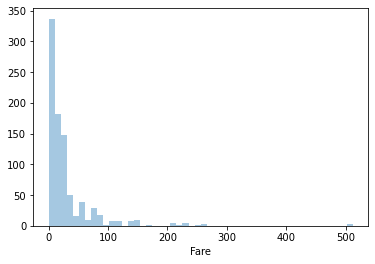

In [15]:
sns.distplot(titanic["Fare"],kde=False)

In [16]:
#we can see that Fare is extremely skewed so we add log() to reduce the skewness
titanic["Fare"]=titanic["Fare"].apply(lambda x: np.log(x) if x>0 else 0)

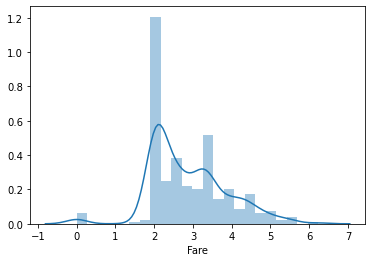

In [17]:
sns.distplot(titanic["Fare"])

[Text(0, 0, 'Southampton'), Text(0, 0, 'Cherbourg'), Text(0, 0, 'Queenstown')]

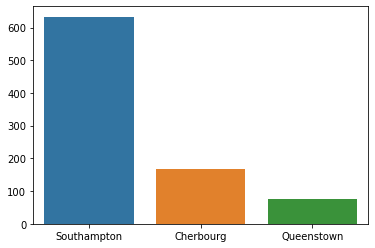

In [18]:
embarked_count=titanic["Embarked"].value_counts()
ax=sns.barplot(x=embarked_count.index,y=embarked_count.values)
ax.set_xticklabels(["Southampton","Cherbourg","Queenstown"],rotation=0)

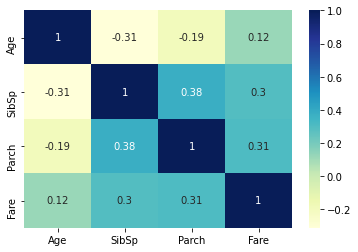

In [19]:
sns.heatmap(titanic[col].corr(),annot=True,cmap="YlGnBu")

# Missing Value Refill and Feature Engineering

In [20]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [21]:
titanic.drop(columns=["Cabin"],inplace=True)

In [22]:
#fil the Age and Fare with median and fill the embarked with the most common value ("S")
titanic["Age"]=titanic["Age"].fillna(titanic["Age"].mean())
titanic["Fare"]=titanic["Fare"].fillna(titanic["Fare"].mean())
titanic["Embarked"]=titanic["Embarked"].fillna("S")

In [23]:
sex_map={"female":0,"male":1}
embark_map={"S":0,"C":1,"Q":2}
titanic["Sex"]=titanic["Sex"].map(sex_map)
titanic["Embarked"]=titanic["Embarked"].map(embark_map)

In [24]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,0


In [25]:
titanic["Age Group"]=np.zeros(len(titanic))
def split_group(row):
    if row["Age"] <= titanic["Age"].quantile(0.25):
        row["Age Group"]=0
    elif row["Age"] > titanic["Age"].quantile(0.25) and row["Age"] <= titanic["Age"].quantile(0.5):
        row["Age Group"]=1
    elif row["Age"] > titanic["Age"].quantile(0.5) and row["Age"] <= titanic["Age"].quantile(0.75):
        row["Age Group"]=2
    else:
        row["Age Group"]=3
        
    return row
titanic=titanic.apply(split_group,axis=1)

In [26]:
titanic.drop(columns=["Age"],inplace=True)

In [27]:
titanic["Family Size"]=titanic["SibSp"]+titanic["Parch"]

In [28]:
titanic["Title"]=titanic["Name"].str.extract(r'([A-Za-z]+\.)')

In [29]:
titanic["Title"].value_counts()

Mr.          513
Miss.        177
Mrs.         125
Master.       39
Dr.            7
Rev.           6
Mlle.          2
Col.           2
Major.         2
Jonkheer.      1
Sir.           1
Mme.           1
Don.           1
Ms.            1
Countess.      1
Lady.          1
Name: Title, dtype: int64

In [31]:
titanic["Title"]=titanic["Title"].replace(["Ms.","Lady.","Countess.","Sir.","Jonkheer.","Don.","Mme."],"Others")

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
title_labels=le.fit_transform(titanic["Title"])
titanic["Title"]=title_labels

In [36]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age Group,Family Size,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,0,0,1,6
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,1,3,1,7
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,0,1,0,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,0,2,1,7
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,0,2,0,6


# Modelling

In [37]:
features=["Pclass","Sex","Fare","Embarked","Age Group","Family Size","Title"]
X=titanic[features]
y=titanic["Survived"]

**Logistic Regression**

In [65]:
C=[0.01,0.1,1,5,10]
score_list=[]
for c in C:    
    logistic=LogisticRegression(C=c).fit(X,y)
    score=cross_val_score(logistic, X, y, cv=5, scoring = 'accuracy').mean()
    score_list.append(score)
    print("when c is {0}, the accuracy is {1:.3f}".format(c,score))
print("the highest accuracy for logistic regression is {0:.3f}.".format(sorted(score_list)[-1])))

when c is 0.01, the accuracy is 0.734
when c is 0.1, the accuracy is 0.778
when c is 1, the accuracy is 0.786
when c is 5, the accuracy is 0.789
when c is 10, the accuracy is 0.789
the highest accuracy for logistic regression is 0.789.


**SVC with rbf Kernel**

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
svc = SVC()
grid_values = {'gamma': [0.01, 0.05, 0.1, 1, 10, 100],"C":[0.01, 0.05, 0.1, 1, 10, 100]}
grid_svm_acc = GridSearchCV(svc, param_grid = grid_values,scoring="accuracy")
grid_svm_acc.fit(X,y)
print('Grid best parameter (max. accuracy): ', grid_svm_acc.best_params_)
print('Grid best score (accuracy): ', grid_svm_acc.best_score_)

Grid best parameter (max. accuracy):  {'C': 10, 'gamma': 0.05}
Grid best score (accuracy):  0.8295454545454545


In [76]:
from sklearn.svm import SVC
svc=SVC(C=10,gamma=0.05).fit(X,y)
print("the highest accuracy for rbf SVM is {0:.3f}.".
      format(cross_val_score(svc, X, y, cv=5, scoring = 'accuracy').mean()))

the highest accuracy for rbf SVM is 0.830.


**Decision Tree**

In [82]:
decision_tree=DecisionTreeClassifier().fit(X,y)
grid_values = {'max_depth': range(2,10),"min_samples_split":range(2,50)}
grid_tree_acc = GridSearchCV(decision_tree, param_grid = grid_values,scoring="accuracy")
grid_tree_acc.fit(X,y)
print('Grid best parameter (max. accuracy): ', grid_tree_acc.best_params_)
print('Grid best score (accuracy): ', grid_tree_acc.best_score_)

Grid best parameter (max. accuracy):  {'max_depth': 7, 'min_samples_split': 4}
Grid best score (accuracy):  0.8329545454545455


In [85]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=grid_tree_acc.best_estimator_.fit(X,y)
print("the highest accuracy for decision tree is {0:.3f}.".
      format(cross_val_score(decision_tree, X, y, cv=5, scoring = 'accuracy').mean()))

the highest accuracy for decision tree is 0.832.


In [87]:
decision_tree.feature_importances_

array([0.11288217, 0.4601993 , 0.21785456, 0.01518987, 0.02987821,
       0.09417743, 0.06981845])

In [96]:
tree_feature_importance=pd.Series(decision_tree.feature_importances_,index=X.columns)
tree_feature_importance.sort_values(ascending=False)

Sex            0.460199
Fare           0.217855
Pclass         0.112882
Family Size    0.094177
Title          0.069818
Age Group      0.029878
Embarked       0.015190
dtype: float64

**Random Forest**

In [97]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier().fit(X, y)
cross_val_score(random_forest, X, y, cv=5, scoring = 'accuracy').mean()

In [101]:
random_forest=RandomForestClassifier().fit(X, y)
grid_values = {'n_estimators':[100,500,1000],'max_depth': range(2,10),"min_samples_split":range(2,50)}
grid_forest_acc = GridSearchCV(random_forest, param_grid = grid_values,scoring="accuracy",n_jobs=4)
grid_forest_acc.fit(X,y)
print('Grid best parameter (max. accuracy): ', grid_forest_acc.best_params_)
print('Grid best score (accuracy): ', grid_forest_acc.best_score_)

Grid best parameter (max. accuracy):  {'max_depth': 9, 'min_samples_split': 24, 'n_estimators': 100}
Grid best score (accuracy):  0.8329545454545453


In [102]:
random_forest=grid_forest_acc.best_estimator_.fit(X,y)
print("the highest accuracy for random forest is {0:.3f}.".
      format(cross_val_score(random_forest, X, y, cv=5, scoring = 'accuracy').mean()))

the highest accuracy for random forest is 0.826.


In [103]:
random_forest.feature_importances_

array([0.12163052, 0.37753496, 0.17792051, 0.02767267, 0.03449052,
       0.08154211, 0.17920871])

In [104]:
forest_feature_importance=pd.Series(random_forest.feature_importances_,index=X.columns)
forest_feature_importance.sort_values(ascending=False)

Sex            0.377535
Title          0.179209
Fare           0.177921
Pclass         0.121631
Family Size    0.081542
Age Group      0.034491
Embarked       0.027673
dtype: float64

**GBDT**

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier().fit(X, y)
cross_val_score(gbdt, X, y, cv=5, scoring = 'accuracy').mean()

0.8215909090909091

In [107]:
gbdt=GradientBoostingClassifier().fit(X, y)
grid_values = {'learning_rate':[0.01,0.1,1,10,100],'max_depth': range(2,10)}
gbdt_acc = GridSearchCV(gbdt, param_grid = grid_values,scoring="accuracy",n_jobs=4)
gbdt_acc.fit(X,y)
print('Grid best parameter (max. accuracy): ', gbdt_acc.best_params_)
print('Grid best score (accuracy): ', gbdt_acc.best_score_)

Grid best parameter (max. accuracy):  {'learning_rate': 0.01, 'max_depth': 6}
Grid best score (accuracy):  0.8420454545454545


In [115]:
gbdt=gbdt_acc.best_estimator_.fit(X,y)
print("the highest accuracy for random forest is {0:.3f}.".
      format(cross_val_score(gbdt, X, y, cv=5, scoring = 'accuracy').mean()))

the highest accuracy for random forest is 0.843.


In [116]:
gbdt.feature_importances_

array([0.12497122, 0.47448059, 0.21451079, 0.01453048, 0.02386156,
       0.0755011 , 0.07214426])

In [117]:
gbdt_feature_importance=pd.Series(gbdt.feature_importances_,index=X.columns)
gbdt_feature_importance.sort_values(ascending=False)

Sex            0.474481
Fare           0.214511
Pclass         0.124971
Family Size    0.075501
Title          0.072144
Age Group      0.023862
Embarked       0.014530
dtype: float64

# Conclusion #

In [120]:
results=np.array([sorted(score_list)[-1],
          cross_val_score(svc, X, y, cv=5, scoring = 'accuracy').mean(),
          cross_val_score(decision_tree, X, y, cv=5, scoring = 'accuracy').mean(),
          cross_val_score(random_forest, X, y, cv=5, scoring = 'accuracy').mean(),
          cross_val_score(gbdt, X, y, cv=5, scoring = 'accuracy').mean()])


alg=["Logistic Regression"," rbf SVM","Decision Tree","Random Forest","GBDT"]

In [122]:
pd.Series(results,index=alg).sort_values(ascending=False)

GBDT                   0.843182
Decision Tree          0.830682
 rbf SVM               0.828409
Random Forest          0.818182
Logistic Regression    0.788636
dtype: float64